In [73]:
import requests
import pandas as pd
from typing import Dict, List
from dataclasses import dataclass
from datetime import datetime
import json
import matplotlib.pyplot as plt

In [74]:
with open('soft_liquidation_user_losses.json', 'r') as file:
    soft_liquidation_user_losses = json.load(file)
    
print(json.dumps(soft_liquidation_user_losses[0], indent=4))

print(json.dumps(soft_liquidation_user_losses[-1], indent=4))

soft_liquidation_user_losses_df = pd.DataFrame(soft_liquidation_user_losses)


{
    "usdEquivalent": 21.077783823470636,
    "blockNumber": 21152100,
    "transactionHash": "0x5230f675e70c307c9750f8ad2ff17c1ceef0009f8a1667e8d97db7bbe0419207",
    "buyer": "0xd4bC53434C5e12cb41381A556c3c47e1a86e80E3"
}
{
    "usdEquivalent": -1.493429836128081,
    "blockNumber": 21197920,
    "transactionHash": "0x9c083a155ba157dcc428ecd2f3b8e2de1b69458df059a7de77475faf7b810cd7",
    "buyer": "0xd4bC53434C5e12cb41381A556c3c47e1a86e80E3"
}


---


In [75]:
with open('band_data.json', 'r') as file:
    band_data_21153400 = json.load(file)
    
print(json.dumps(band_data_21153400[0], indent=4))

print(json.dumps(band_data_21153400[-1], indent=4))

{
    "blockNumber": 21153200,
    "band": -34,
    "amountBorrowableToken": 46669.86669226601,
    "amountCollatToken": 5.4837796190186845,
    "oraclePrice": 3079.198408782999,
    "amountCollatTokenInUsd": 16885.645476998976,
    "amountFullInBandInUsd": 63555.512169264985
}
{
    "blockNumber": 21153599,
    "band": -36,
    "amountBorrowableToken": 20051.149096751826,
    "amountCollatToken": 1.7871625991856297,
    "oraclePrice": 3123.208708796826,
    "amountCollatTokenInUsd": 5581.6817938125305,
    "amountFullInBandInUsd": 25632.830890564357
}


In [76]:
# Create DataFrame from curve_markets
band_data_21153400_df = pd.DataFrame(band_data_21153400)

# Sort by timestamp
band_data_21153400_df = band_data_21153400_df.sort_values(by='blockNumber', ascending=True)
band_data_21153400_df["crvUSD"] = band_data_21153400_df["amountBorrowableToken"]
band_data_21153400_df["collateral"] = band_data_21153400_df["amountCollatTokenInUsd"]


In [77]:
with open('big_price_oracle_results.json', 'r') as file:
    price_weth = json.load(file)

print(json.dumps(price_weth[0], indent=4))

print(json.dumps(price_weth[-1], indent=4))    

{
    "blockNumber": 20601333,
    "price_oracle": 2757.8897427089073,
    "get_p": 2706.2786352612675
}
{
    "blockNumber": 21249333,
    "price_oracle": 3370.5054739461284,
    "get_p": 3465.3015584993327
}


In [78]:
# Create DataFrame from curve_markets
price_weth_df = pd.DataFrame(price_weth)

# Sort by timestamp
price_weth_df = price_weth_df.sort_values(by='blockNumber', ascending=True)
price_weth_df["delta"] = price_weth_df["get_p"].diff()
price_weth_df["delta_ratio"] = price_weth_df["delta"] / price_weth_df["get_p"]
price_weth_df["abs_diff"] = (price_weth_df["get_p"] - price_weth_df["price_oracle"])

---

In [79]:
print(price_weth_df.info())
print("-"*50)
print(band_data_21153400_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 648001 entries, 0 to 648000
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   blockNumber   648001 non-null  int64  
 1   price_oracle  647378 non-null  float64
 2   get_p         647751 non-null  float64
 3   delta         647651 non-null  float64
 4   delta_ratio   647651 non-null  float64
 5   abs_diff      647142 non-null  float64
dtypes: float64(5), int64(1)
memory usage: 29.7 MB
None
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   blockNumber             400 non-null    int64  
 1   band                    400 non-null    int64  
 2   amountBorrowableToken   400 non-null    float64
 3   amountCollatToken       400 non-null    float64
 4   orac

In [80]:
# Inner join the DataFrames
joined_df = pd.merge(
    price_weth_df,  # first DataFrame
    band_data_21153400_df,   # second DataFrame
    on='blockNumber',  # join column
    how='inner'       # inner join
)

joined_df = pd.merge(
    joined_df,
    soft_liquidation_user_losses_df,
    on='blockNumber',
    how='left'
)

# Verify the join result
print(joined_df.info())

joined_df["zero"] = 0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   blockNumber             400 non-null    int64  
 1   price_oracle            400 non-null    float64
 2   get_p                   400 non-null    float64
 3   delta                   400 non-null    float64
 4   delta_ratio             400 non-null    float64
 5   abs_diff                400 non-null    float64
 6   band                    400 non-null    int64  
 7   amountBorrowableToken   400 non-null    float64
 8   amountCollatToken       400 non-null    float64
 9   oraclePrice             400 non-null    float64
 10  amountCollatTokenInUsd  400 non-null    float64
 11  amountFullInBandInUsd   400 non-null    float64
 12  crvUSD                  400 non-null    float64
 13  collateral              400 non-null    float64
 14  usdEquivalent           13 non-null     fl

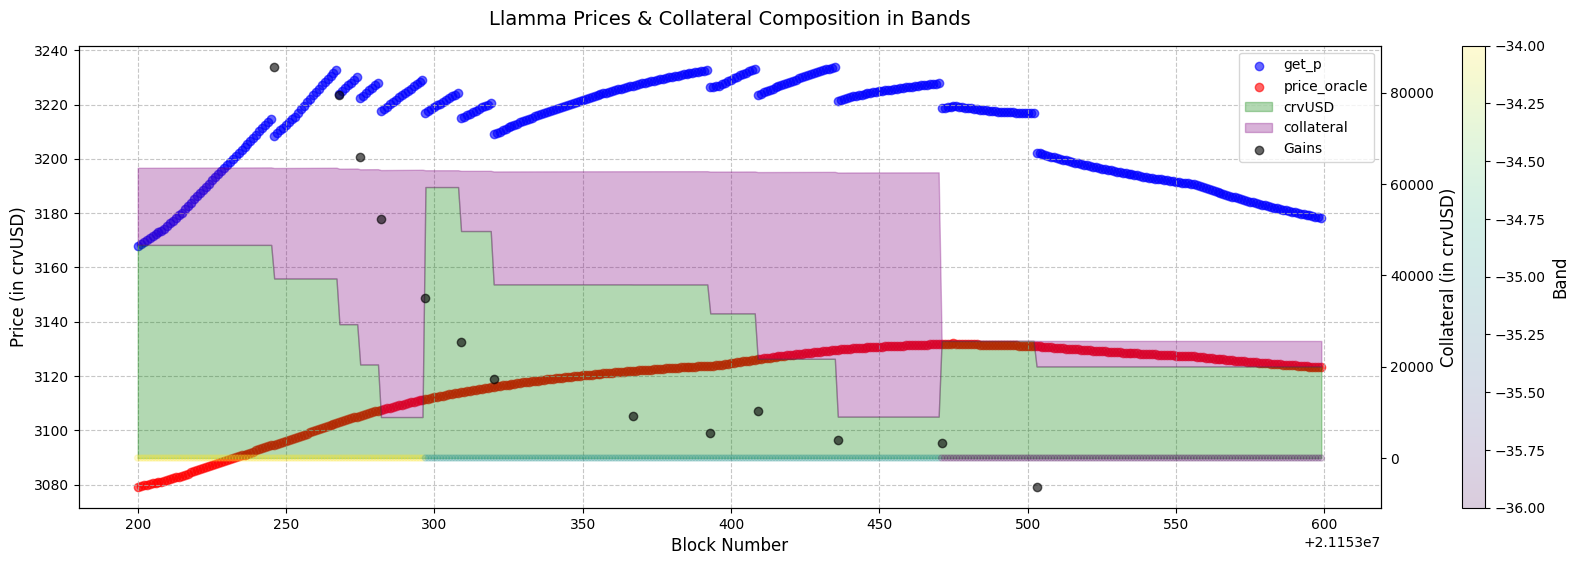

In [81]:
# Create figure and primary axis with larger size for better readability
fig, ax1 = plt.subplots(figsize=(21, 6))

# Create scatter plots for price data
scatter1 = ax1.scatter(joined_df['blockNumber'], joined_df['get_p'], 
                      color='blue', label='get_p', alpha=0.6)
scatter2 = ax1.scatter(joined_df['blockNumber'], joined_df['price_oracle'], 
                      color='red', label='price_oracle', alpha=0.6)
ax1.set_ylabel('Price (in crvUSD)', fontsize=12)

# Create secondary y-axis (right)
ax2 = ax1.twinx()

# Create stacked area chart for amounts
ax2.fill_between(joined_df['blockNumber'], 0, joined_df['crvUSD'], 
                 alpha=0.3, label='crvUSD', color='green')
ax2.fill_between(joined_df['blockNumber'], joined_df['crvUSD'], 
                 joined_df['crvUSD'] + joined_df['collateral'], 
                 alpha=0.3, label='collateral', color='purple')
ax2.scatter(joined_df['blockNumber'], joined_df['usdEquivalent']*2500, 
            color='black', label='Gains', alpha=0.6)
ax2.set_ylabel('Collateral (in crvUSD)', fontsize=12)

# Add band information as color-coded points on top
scatter_bands = ax2.scatter(joined_df['blockNumber'], 
                        #   joined_df['crvUSD'] + joined_df['collateral'],
                          joined_df['zero'], 
                          c=joined_df['band'], cmap='viridis', 
                          alpha=0.2, s=20)

# Add colorbar for band information
cbar = plt.colorbar(scatter_bands)
cbar.set_label('Band', fontsize=12)

# Customize the plot
ax1.set_title('Llamma Prices & Collateral Composition in Bands', fontsize=14, pad=15)
ax1.set_xlabel('Block Number', fontsize=12)
ax1.grid(True, linestyle='--', alpha=0.7)

# Combine legends from both axes
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines1 + lines2, labels1 + labels2, loc='upper right')

# Show the plot
plt.show()

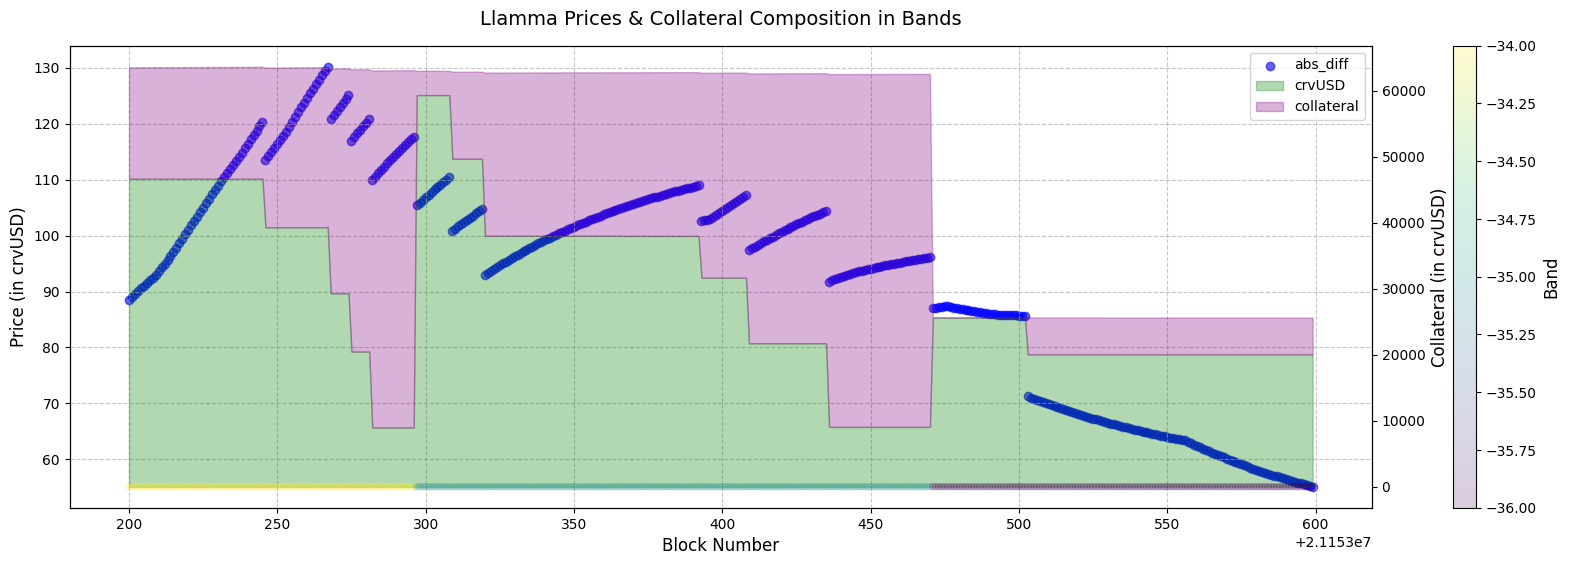

In [82]:
# Create figure and primary axis with larger size for better readability
fig, ax1 = plt.subplots(figsize=(21, 6))

# Create scatter plots for price data
scatter1 = ax1.scatter(joined_df['blockNumber'], joined_df['abs_diff'], 
                      color='blue', label='abs_diff', alpha=0.6)
# scatter2 = ax1.scatter(joined_df['blockNumber'], joined_df['price_oracle'], 
#                       color='red', label='price_oracle', alpha=0.6)
ax1.set_ylabel('Price (in crvUSD)', fontsize=12)

# Create secondary y-axis (right)
ax2 = ax1.twinx()

# Create stacked area chart for amounts
ax2.fill_between(joined_df['blockNumber'], 0, joined_df['crvUSD'], 
                 alpha=0.3, label='crvUSD', color='green')
ax2.fill_between(joined_df['blockNumber'], joined_df['crvUSD'], 
                 joined_df['crvUSD'] + joined_df['collateral'], 
                 alpha=0.3, label='collateral', color='purple')
ax2.set_ylabel('Collateral (in crvUSD)', fontsize=12)

# Add band information as color-coded points on top
scatter_bands = ax2.scatter(joined_df['blockNumber'], 
                        #   joined_df['crvUSD'] + joined_df['collateral'],
                          joined_df['zero'], 
                          c=joined_df['band'], cmap='viridis', 
                          alpha=0.2, s=20)

# Add colorbar for band information
cbar = plt.colorbar(scatter_bands)
cbar.set_label('Band', fontsize=12)

# Customize the plot
ax1.set_title('Llamma Prices & Collateral Composition in Bands', fontsize=14, pad=15)
ax1.set_xlabel('Block Number', fontsize=12)
ax1.grid(True, linestyle='--', alpha=0.7)

# Combine legends from both axes
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines1 + lines2, labels1 + labels2, loc='upper right')

# Show the plot
plt.show()

---

In [83]:
with open('band_data_21160100_300.json', 'r') as file:
    band_data_21160100 = json.load(file)
    
print(json.dumps(band_data_21160100[0], indent=4))

print(json.dumps(band_data_21160100[-1], indent=4))

# Create DataFrame from curve_markets
band_data_21160100_df = pd.DataFrame(band_data_21160100)

# Sort by timestamp
band_data_21160100_df = band_data_21160100_df.sort_values(by='blockNumber', ascending=True)
band_data_21160100_df["crvUSD"] = band_data_21160100_df["amountBorrowableToken"]
band_data_21160100_df["collateral"] = band_data_21160100_df["amountCollatTokenInUsd"]


{
    "blockNumber": 21159800,
    "band": -39,
    "amountBorrowableToken": 14480.607799795232,
    "amountCollatToken": 1.2003156266891344,
    "oraclePrice": 3161.570781564908,
    "amountCollatTokenInUsd": 3794.882813996139,
    "amountFullInBandInUsd": 18275.49061379137
}
{
    "blockNumber": 21160399,
    "band": -38,
    "amountBorrowableToken": 14281.791277412352,
    "amountCollatToken": 0.8912391365372203,
    "oraclePrice": 3177.0945014598133,
    "amountCollatTokenInUsd": 2831.5509601781946,
    "amountFullInBandInUsd": 17113.342237590547
}


In [98]:
# Inner join the DataFrames
joined_df_21160100 = pd.merge(
    price_weth_df,  # first DataFrame
    band_data_21160100_df,   # second DataFrame
    on='blockNumber',  # join column
    how='inner'       # inner join
)

joined_df_21160100 = joined_df_21160100.dropna()

joined_df_21160100 = pd.merge(
    joined_df_21160100,
    soft_liquidation_user_losses_df,
    on='blockNumber',
    how='left'
)

# Verify the join result
print(joined_df_21160100.info())

joined_df_21160100["zero"] = 0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   blockNumber             599 non-null    int64  
 1   price_oracle            599 non-null    float64
 2   get_p                   599 non-null    float64
 3   delta                   599 non-null    float64
 4   delta_ratio             599 non-null    float64
 5   abs_diff                599 non-null    float64
 6   band                    599 non-null    float64
 7   amountBorrowableToken   599 non-null    float64
 8   amountCollatToken       599 non-null    float64
 9   oraclePrice             599 non-null    float64
 10  amountCollatTokenInUsd  599 non-null    float64
 11  amountFullInBandInUsd   599 non-null    float64
 12  crvUSD                  599 non-null    float64
 13  collateral              599 non-null    float64
 14  usdEquivalent           9 non-null      fl

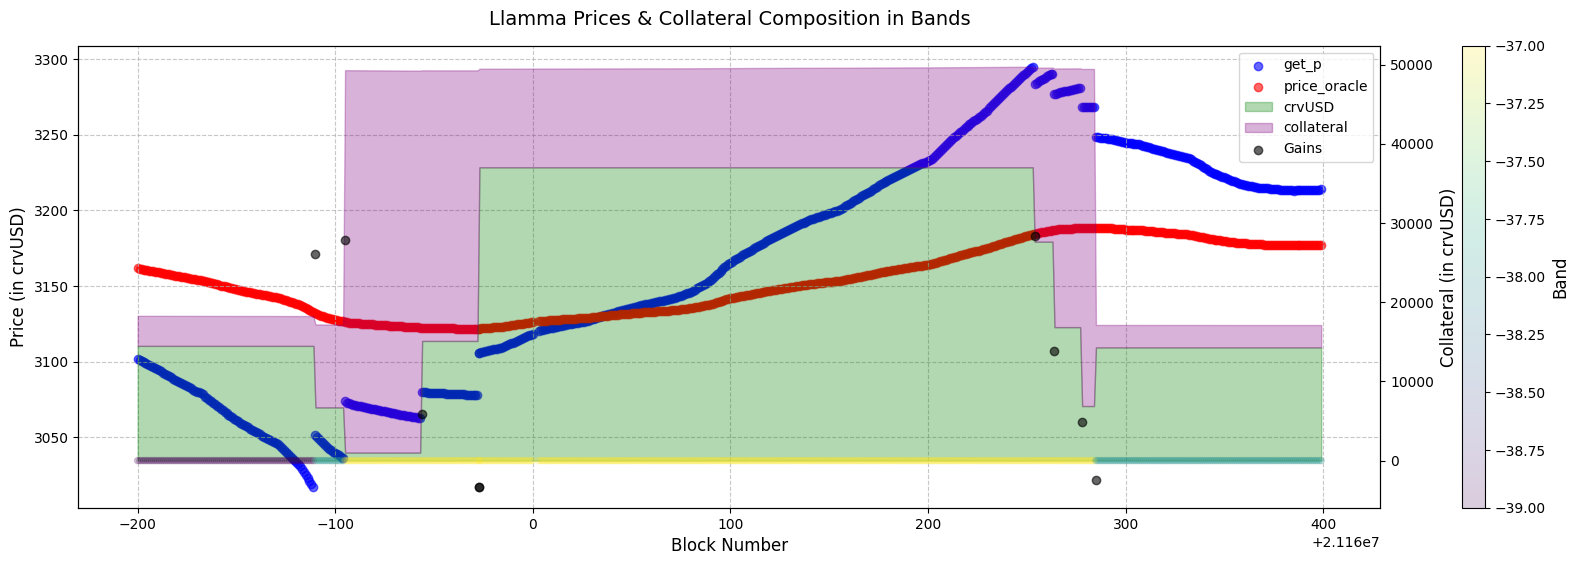

In [99]:


# Create figure and primary axis with larger size for better readability
fig, ax1 = plt.subplots(figsize=(21, 6))

# Create scatter plots for price data
scatter1 = ax1.scatter(joined_df_21160100['blockNumber'], joined_df_21160100['get_p'], 
                      color='blue', label='get_p', alpha=0.6)
scatter2 = ax1.scatter(joined_df_21160100['blockNumber'], joined_df_21160100['price_oracle'], 
                      color='red', label='price_oracle', alpha=0.6)
ax1.set_ylabel('Price (in crvUSD)', fontsize=12)

# Create secondary y-axis (right)
ax2 = ax1.twinx()

# Create stacked area chart for amounts
ax2.fill_between(joined_df_21160100['blockNumber'], 0, joined_df_21160100['crvUSD'], 
                 alpha=0.3, label='crvUSD', color='green')
ax2.fill_between(joined_df_21160100['blockNumber'], joined_df_21160100['crvUSD'], 
                 joined_df_21160100['crvUSD'] + joined_df_21160100['collateral'], 
                 alpha=0.3, label='collateral', color='purple')
ax2.scatter(joined_df_21160100['blockNumber'], joined_df_21160100['usdEquivalent']*2500, 
            color='black', label='Gains', alpha=0.6)
ax2.set_ylabel('Collateral (in crvUSD)', fontsize=12)

# Add band information as color-coded points on top
scatter_bands = ax2.scatter(joined_df_21160100['blockNumber'], 
                        #   joined_df_21160100['crvUSD'] + joined_df_21160100['collateral'],
                          joined_df_21160100['zero'], 
                          c=joined_df_21160100['band'], cmap='viridis', 
                          alpha=0.2, s=20)

# Add colorbar for band information
cbar = plt.colorbar(scatter_bands)
cbar.set_label('Band', fontsize=12)

# Customize the plot
ax1.set_title('Llamma Prices & Collateral Composition in Bands', fontsize=14, pad=15)
ax1.set_xlabel('Block Number', fontsize=12)
ax1.grid(True, linestyle='--', alpha=0.7)

# Combine legends from both axes
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines1 + lines2, labels1 + labels2, loc='upper right')

# Show the plot
plt.show()

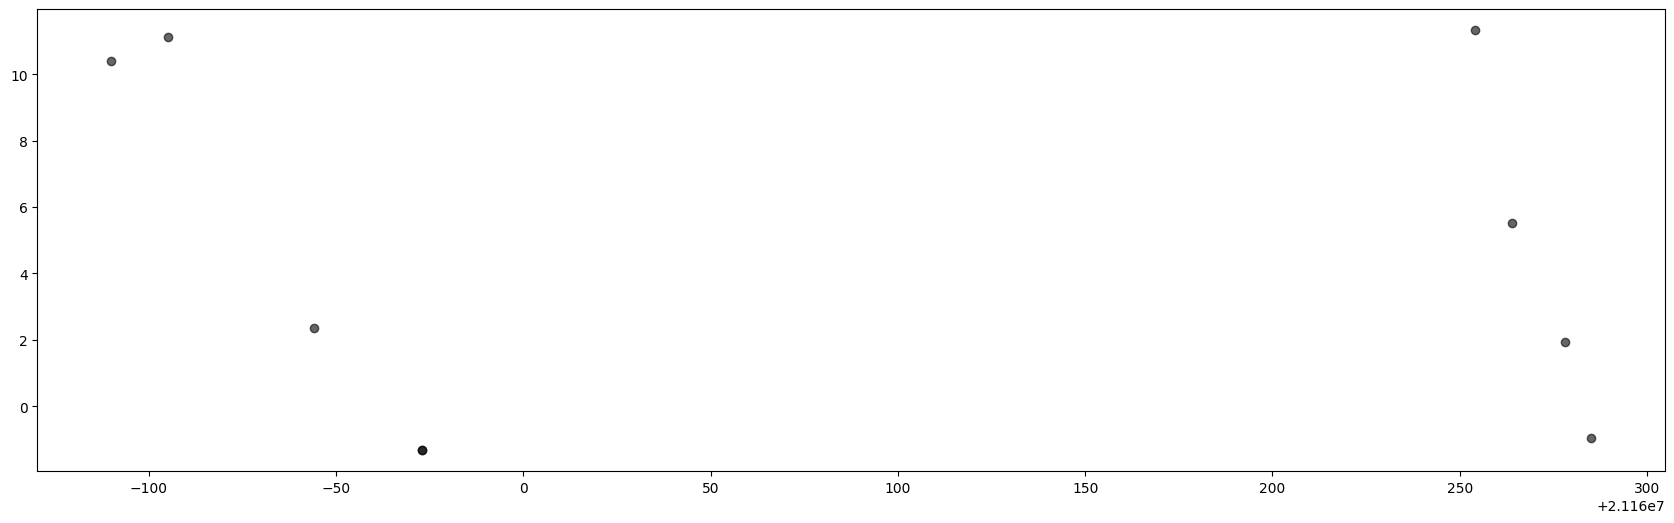

In [100]:
fig = plt.subplots(figsize=(21, 6))

scatter = plt.scatter(joined_df_21160100['blockNumber'], joined_df_21160100['usdEquivalent'], 
            color='black', label='Gains', alpha=0.6)

plt.show()

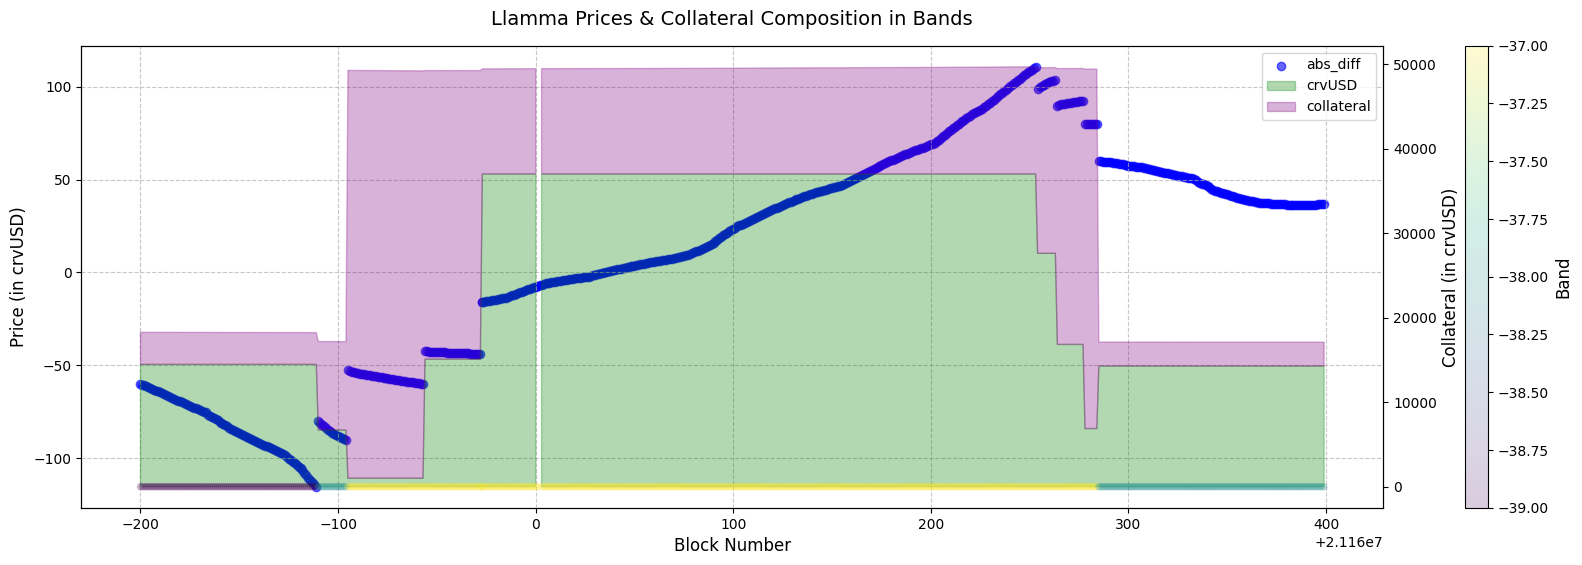

In [86]:
# Create figure and primary axis with larger size for better readability
fig, ax1 = plt.subplots(figsize=(21, 6))

# Create scatter plots for price data
scatter1 = ax1.scatter(joined_df_21160100['blockNumber'], joined_df_21160100['abs_diff'], 
                      color='blue', label='abs_diff', alpha=0.6)
# scatter2 = ax1.scatter(joined_df_21160100['blockNumber'], joined_df_21160100['price_oracle'], 
#                       color='red', label='price_oracle', alpha=0.6)
ax1.set_ylabel('Price (in crvUSD)', fontsize=12)

# Create secondary y-axis (right)
ax2 = ax1.twinx()

# Create stacked area chart for amounts
ax2.fill_between(joined_df_21160100['blockNumber'], 0, joined_df_21160100['crvUSD'], 
                 alpha=0.3, label='crvUSD', color='green')
ax2.fill_between(joined_df_21160100['blockNumber'], joined_df_21160100['crvUSD'], 
                 joined_df_21160100['crvUSD'] + joined_df_21160100['collateral'], 
                 alpha=0.3, label='collateral', color='purple')
ax2.set_ylabel('Collateral (in crvUSD)', fontsize=12)

# Add band information as color-coded points on top
scatter_bands = ax2.scatter(joined_df_21160100['blockNumber'], 
                        #   joined_df_21160100['crvUSD'] + joined_df_21160100['collateral'],
                          joined_df_21160100['zero'], 
                          c=joined_df_21160100['band'], cmap='viridis', 
                          alpha=0.2, s=20)

# Add colorbar for band information
cbar = plt.colorbar(scatter_bands)
cbar.set_label('Band', fontsize=12)

# Customize the plot
ax1.set_title('Llamma Prices & Collateral Composition in Bands', fontsize=14, pad=15)
ax1.set_xlabel('Block Number', fontsize=12)
ax1.grid(True, linestyle='--', alpha=0.7)

# Combine legends from both axes
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines1 + lines2, labels1 + labels2, loc='upper right')

# Show the plot
plt.show()

In [87]:
def plot_price_window(df: pd.DataFrame, block_number: int, window_size: int = 100):
    """
    Plot oracle and current prices for a window of blocks around a specific block number
    
    Parameters:
    -----------
    df : pd.DataFrame
        DataFrame containing price data with 'blockNumber', 'get_p', and 'price_oracle' columns
    block_number : int
        The central block number to focus on
    window_size : int
        Number of blocks to show before and after the central block (default: 100)
    """
    # Filter data for the specified window
    mask = (df['blockNumber'] >= block_number - window_size) & \
           (df['blockNumber'] <= block_number + window_size)
    window_df = df[mask]
    
    # Create the plot
    plt.figure(figsize=(12, 6))
    
    # Plot both price series using scatter
    plt.scatter(window_df['blockNumber'], window_df['get_p'], 
               label='get_p', alpha=0.6)
    plt.scatter(window_df['blockNumber'], window_df['price_oracle'], 
               label='price_oracle', alpha=0.6)
    
    # Add vertical line for the specified block
    plt.axvline(x=block_number, color='r', linestyle='--', 
                alpha=0.5, label='Selected Block')
    
    # Customize the plot
    plt.title(f'Oracle Price vs Current Price Around Block {block_number}', 
             fontsize=14, pad=15)
    plt.xlabel('Block Number', fontsize=12)
    plt.ylabel('Price (USD)', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.legend()
    
    # Adjust layout to prevent label cutoff
    plt.tight_layout()
    
    # Show the plot
    plt.show()

In [88]:
print((21152000 + 21153600)/2)

21152800.0


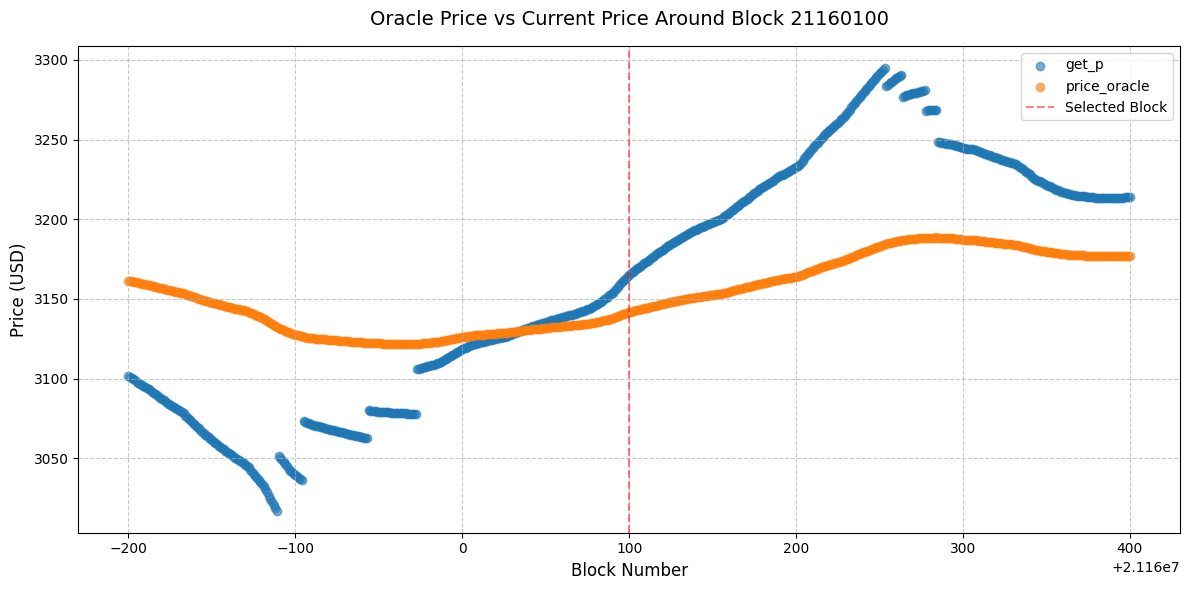

21153600

In [89]:
plot_price_window(price_weth_df, 21160100, 300)

21152000
21153600

In [90]:
def plot_delta_distribution(col_name: str, df: pd.DataFrame, block_number: int, window_size: int = 100, y_limit: float = None):
    """
    Plot price delta distribution with optional y-axis limits
    
    Parameters:
    -----------
    df : pd.DataFrame
        DataFrame containing price data with 'blockNumber' and 'delta' columns
    y_limit : float
        Optional y-axis limit to zoom in on specific range (will show ±y_limit)
    """
    
    # Filter data for the specified window
    mask = (df['blockNumber'] >= block_number - window_size) & \
           (df['blockNumber'] <= block_number + window_size)
        #    (df['delta_ratio'] < -0.001) | (df['delta_ratio'] > 0.001)
    window_df = df[mask]
    
    # Create the plot
    plt.figure(figsize=(12, 6))
    
    # Plot delta using scatter
    plt.scatter(window_df['blockNumber'], window_df[col_name], 
               label=col_name, alpha=0.6, color='purple')
    
    # Add horizontal line at y=0 to show the baseline
    plt.axhline(y=0, color='r', linestyle='--', alpha=0.3)
    
    # Set y-axis limits if specified
    if y_limit is not None:
        plt.ylim(-y_limit, y_limit)
        title_suffix = f" (±{y_limit} USD)"
    else:
        title_suffix = ""
    
    # Customize the plot
    plt.title(f'Price Delta Over Time{title_suffix}', fontsize=14, pad=15)
    plt.xlabel('Block Number', fontsize=12)
    plt.ylabel('Price Delta (USD)', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.legend()
    
    # Adjust layout to prevent label cutoff
    plt.tight_layout()
    
    # Show the plot
    plt.show()

In [91]:
# plot_delta_distribution("delta_ratio", df, 21240000, 10000000)
plot_delta_distribution("abs_diff", df, 21153400, 200)


NameError: name 'df' is not defined

---

In [ ]:
hubhub

In [10]:
with open('soft_liquidation_results.json', 'r') as file:
    curve_markets = json.load(file)


In [11]:
# Create DataFrame from curve_markets
df = pd.DataFrame(curve_markets)

# Sort by timestamp
df = df.sort_values(by='timestamp', ascending=True)

# Convert timestamp to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='s')

df["abs_delta"] = abs(df["currentPrice"] - df["priceOracle"])
df["abs_delta_ratio"] = abs(df["currentPrice"] - df["priceOracle"])/df["priceOracle"]
df["delta"] = df["currentPrice"] - df["priceOracle"]

# Filter marketName = "WBTC"
df = df[df['marketName'] == "WBTC"]




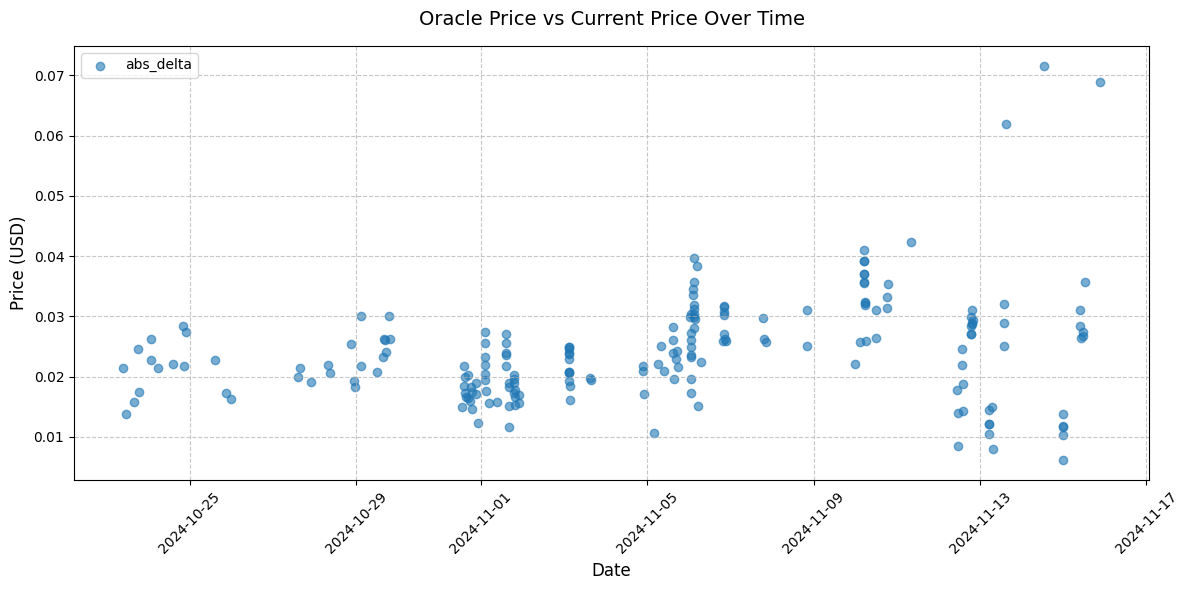

In [12]:

# Create the plot
plt.figure(figsize=(12, 6))

# Plot both price series using scatter
# plt.scatter(df['timestamp'], df['delta'], label='delta', alpha=0.6)
plt.scatter(df['timestamp'], df['abs_delta_ratio'], label='abs_delta', alpha=0.6)

# Customize the plot
plt.title('Oracle Price vs Current Price Over Time', fontsize=14, pad=15)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price (USD)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Adjust layout to prevent label cutoff
plt.tight_layout()

plt.show()

# # Print basic statistics
# print("\nPrice Statistics:")
# print(df[['priceOracle', 'currentPrice']].describe())

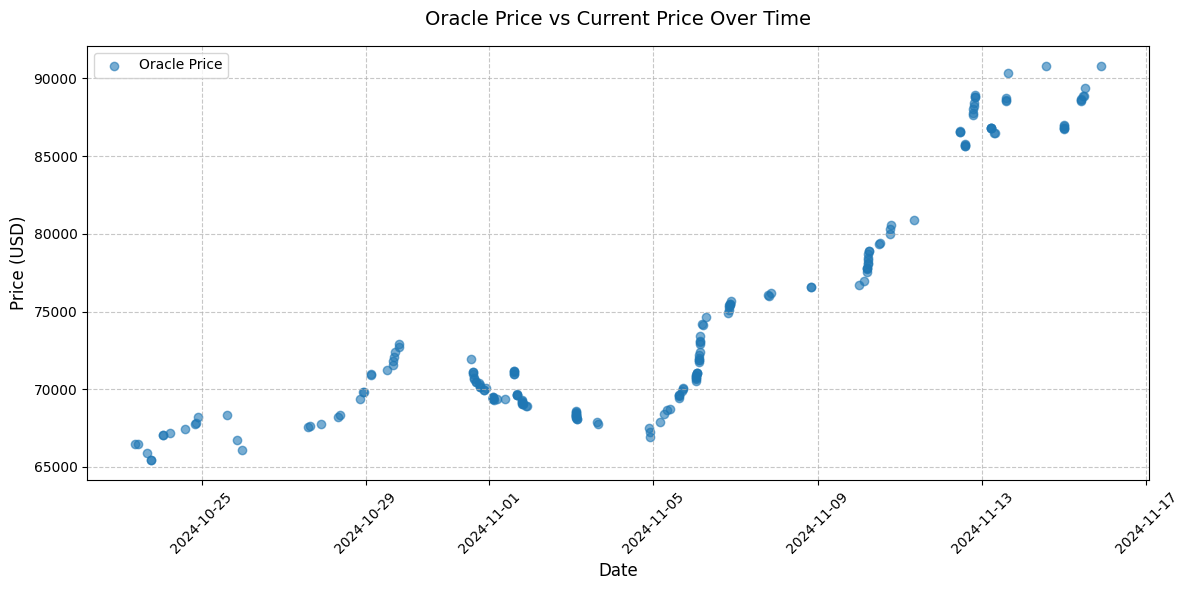


Price Statistics:
        priceOracle  currentPrice
count    194.000000    194.000000
mean   74509.815299  75284.278492
std     7347.415578   8178.822926
min    65416.474697  63857.464710
25%    69232.944071  68659.874627
50%    71070.138832  72696.158108
75%    78249.610954  80952.708126
max    90827.930894  97333.800202


In [13]:

# Create the plot
plt.figure(figsize=(12, 6))

# Plot both price series using scatter
plt.scatter(df['timestamp'], df['priceOracle'], label='Oracle Price', alpha=0.6)
# plt.scatter(df['timestamp'], df['currentPrice'], label='Current Price', alpha=0.6)

# Customize the plot
plt.title('Oracle Price vs Current Price Over Time', fontsize=14, pad=15)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price (USD)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Adjust layout to prevent label cutoff
plt.tight_layout()

plt.show()

# Print basic statistics
print("\nPrice Statistics:")
print(df[['priceOracle', 'currentPrice']].describe())